In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
#import csv
videos_df = pd.read_csv('videos_df.csv')
agg_videos_df = pd.read_csv('agg_videos_df.csv')
channel_df = pd.read_csv('channel_df.csv')
socialblade_df = pd.read_csv('socialblade_df.csv')

# Data Exploration

### Channels

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [4]:
#join channel_df and socialblade_df
channel_info = pd.merge(socialblade_df,channel_df, left_on='Channel ID', right_on='channelId', how='left')
#          .drop(['id1', 'rating'], axis=1)
channel_info

,Channel Name,Channel ID,Category,channelId,description,publishedAt,region,subscriberCount,videoCount,viewCount
0,Top Gear,UCjOl2AUblVmg2rA_cRgZkFg,AUTO & VEHICLES,UCjOl2AUblVmg2rA_cRgZkFg,Welcome to the official home of Top Gear on Yo...,2006-03-27T10:22:50Z,US,7610000,1354,3012156814
1,ChrisFix,UCes1EvRjcKU4sY_UEavndBw,AUTO & VEHICLES,UCes1EvRjcKU4sY_UEavndBw,Learn how to fix your own car with my easy to ...,2008-07-30T14:59:12Z,US,6920000,337,1020793024
2,MotorTrend Channel,UCsAegdhiYLEoaFGuJFVrqFQ,AUTO & VEHICLES,UCsAegdhiYLEoaFGuJFVrqFQ,The ultimate automotive streaming service. Get...,2006-03-11T08:32:34Z,US,6580000,2214,1169502258
3,carwow,UCUhFaUpnq31m6TNX2VKVSVA,AUTO & VEHICLES,UCUhFaUpnq31m6TNX2VKVSVA,On the lookout for your next car? Head to carw...,2014-01-02T16:32:13Z,US,4650000,1317,1401956976
4,Supercar Blondie,UCKSVUHI9rbbkXhvAXK-2uxA,AUTO & VEHICLES,UCKSVUHI9rbbkXhvAXK-2uxA,"I'm Alex, that girl with the cars and I hunt d...",2007-09-12T17:33:49Z,US,4700000,239,363377842
...,...,...,...,...,...,...,...,...,...,...
155,Food Insider,UCwiTOchWeKjrJZw7S1H__1g,TRAVEL,UCwiTOchWeKjrJZw7S1H__1g,What you want to know about food. A division o...,2017-10-17T21:11:29Z,US,2560000,1052,864259797
156,Sam Chui,UCfYCRj25JJQ41JGPqiqXmJw,TRAVEL,UCfYCRj25JJQ41JGPqiqXmJw,My soul is in the sky! I hope my videos can br...,2007-11-04T00:22:28Z,US,2340000,337,511078250
157,bald and bankrupt,UCxDZs_ltFFvn0FDHT6kmoXA,TRAVEL,UCxDZs_ltFFvn0FDHT6kmoXA,Going off the map in former Soviet lands...,2018-06-12T11:56:25Z,US,2250000,212,293687890
158,FUNG BROS.,UC9avFXTdbSo5ATvzTRnAVFg,TRAVEL,UC9avFXTdbSo5ATvzTRnAVFg,NEW VIDEOS MONDAYS AND THURSDAYS** Two brother...,2011-05-22T00:19:55Z,US,2120000,873,422298713


In [21]:
channel_info[channel_info["Channel ID"]==channel_info["channelId"]]

,Channel Name,Channel ID,Category,channelId,description,publishedAt,region,subscriberCount,videoCount,viewCount
0,Top Gear,UCjOl2AUblVmg2rA_cRgZkFg,AUTO & VEHICLES,UCjOl2AUblVmg2rA_cRgZkFg,Welcome to the official home of Top Gear on Yo...,2006-03-27T10:22:50Z,US,7610000,1354,3012156814
1,ChrisFix,UCes1EvRjcKU4sY_UEavndBw,AUTO & VEHICLES,UCes1EvRjcKU4sY_UEavndBw,Learn how to fix your own car with my easy to ...,2008-07-30T14:59:12Z,US,6920000,337,1020793024
2,MotorTrend Channel,UCsAegdhiYLEoaFGuJFVrqFQ,AUTO & VEHICLES,UCsAegdhiYLEoaFGuJFVrqFQ,The ultimate automotive streaming service. Get...,2006-03-11T08:32:34Z,US,6580000,2214,1169502258
3,carwow,UCUhFaUpnq31m6TNX2VKVSVA,AUTO & VEHICLES,UCUhFaUpnq31m6TNX2VKVSVA,On the lookout for your next car? Head to carw...,2014-01-02T16:32:13Z,US,4650000,1317,1401956976
4,Supercar Blondie,UCKSVUHI9rbbkXhvAXK-2uxA,AUTO & VEHICLES,UCKSVUHI9rbbkXhvAXK-2uxA,"I'm Alex, that girl with the cars and I hunt d...",2007-09-12T17:33:49Z,US,4700000,239,363377842
...,...,...,...,...,...,...,...,...,...,...
155,Food Insider,UCwiTOchWeKjrJZw7S1H__1g,TRAVEL,UCwiTOchWeKjrJZw7S1H__1g,What you want to know about food. A division o...,2017-10-17T21:11:29Z,US,2560000,1052,864259797
156,Sam Chui,UCfYCRj25JJQ41JGPqiqXmJw,TRAVEL,UCfYCRj25JJQ41JGPqiqXmJw,My soul is in the sky! I hope my videos can br...,2007-11-04T00:22:28Z,US,2340000,337,511078250
157,bald and bankrupt,UCxDZs_ltFFvn0FDHT6kmoXA,TRAVEL,UCxDZs_ltFFvn0FDHT6kmoXA,Going off the map in former Soviet lands...,2018-06-12T11:56:25Z,US,2250000,212,293687890
158,FUNG BROS.,UC9avFXTdbSo5ATvzTRnAVFg,TRAVEL,UC9avFXTdbSo5ATvzTRnAVFg,NEW VIDEOS MONDAYS AND THURSDAYS** Two brother...,2011-05-22T00:19:55Z,US,2120000,873,422298713


In [8]:
channel_info["viewCount"].max()

80047635676

In [10]:
channel_info[channel_info["viewCount"]==80047635676]

,Channel Name,Channel ID,Category,channelId,description,publishedAt,region,subscriberCount,videoCount,viewCount
20,Cocomelon - Nursery Rhymes,UCbCmjCuTUZos6Inko4u57UQ,EDUCATION,UCbCmjCuTUZos6Inko4u57UQ,"At CoComelon, our primary goal has always been...",2006-09-01T22:18:49Z,US,95500000,570,80047635676


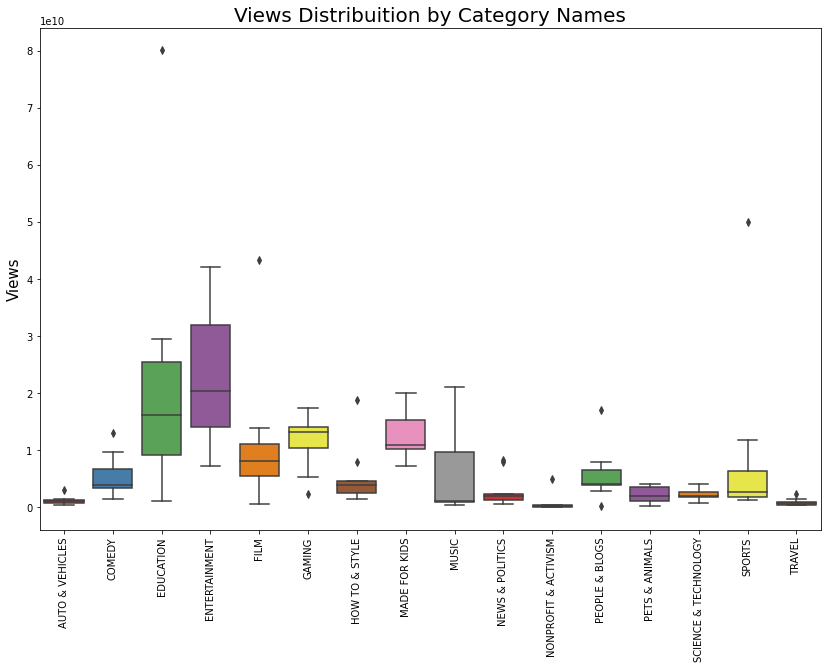

In [22]:
plt.figure(figsize = (14,9))
plt.subplot()
g1 = sns.boxplot(x='Category', y='viewCount', data=channel_info, palette="Set1")
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

In [7]:
channel_info["videoCount"].max()

492795

In [9]:
channel_info[channel_info["videoCount"] == 492795]

,Channel Name,Channel ID,Category,channelId,description,publishedAt,region,subscriberCount,videoCount,viewCount
107,Jeff & Alyssa,UCc4yillQaNo6a-iG2PYbbrA,NONPROFIT & ACTIVISM,UCHTK-2W11Vh1V4uwofOfR4w,Welcome to the AP Archive YouTube Channel. AP ...,2015-06-17T09:50:02Z,US,3200000,492795,1842580834


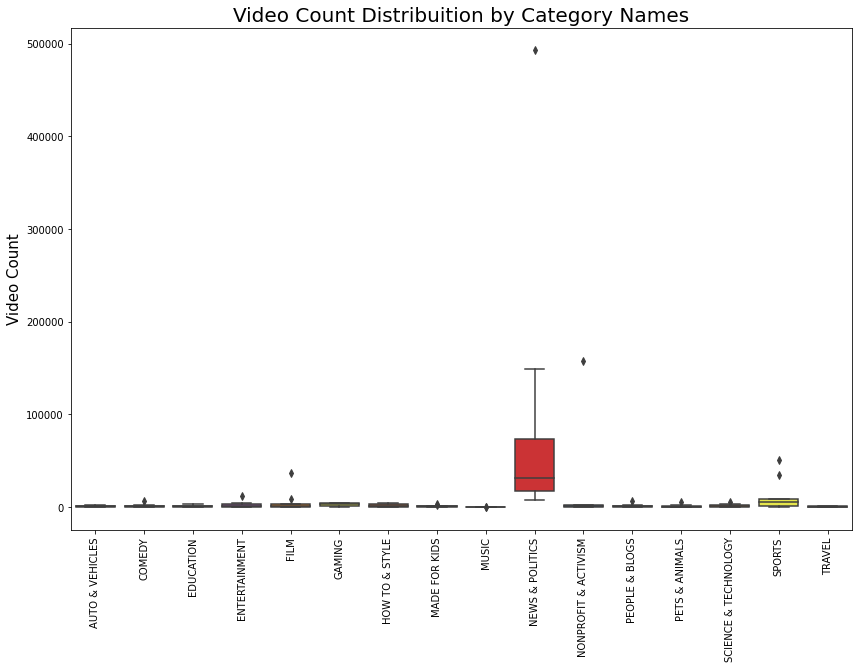

In [23]:
plt.figure(figsize = (14,9))
plt.subplot()
g1 = sns.boxplot(x='Category', y='videoCount', data=channel_info, palette="Set1")
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("Video Count Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Video Count", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

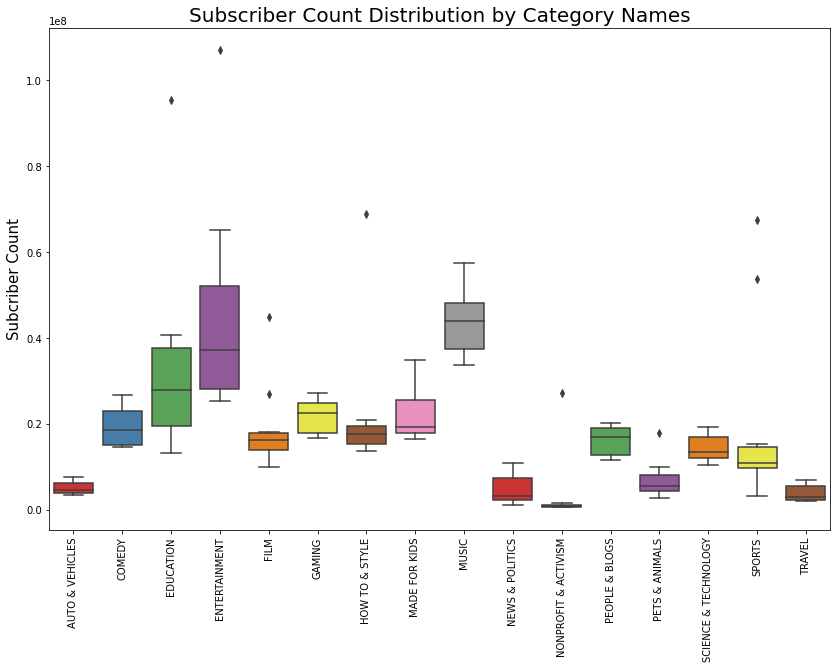

In [24]:
plt.figure(figsize = (14,9))
plt.subplot()
g1 = sns.boxplot(x='Category', y='subscriberCount', data=channel_info, palette="Set1")
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("Subscriber Count Distribution by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Subcriber Count", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

### Videos

In [5]:
#join videos_df and agg_videos_df
video_info = pd.merge(videos_df,agg_videos_df, left_on='videoId', right_on='videoId', how='left')
video_info.head()

,channelId,description,publishedAt,videoId,thumbnails,videoTitle,commentCount,dislikeCount,likeCount,viewCount,daysPublished,likeDislikeRatio,likeCountByDay,commentCountByDay,viewCountByDay,titleLen
0,UCjOl2AUblVmg2rA_cRgZkFg,"In this week's Top Gear, Flintoff gets his han...",2020-10-09 09:35:54,NXX338WY_Lw,https://i.ytimg.com/vi/NXX338WY_Lw/default.jpg,PREVIEW: Attempting 200mph in the Jaguar XJ220...,528.0,257.0,5819.0,184447.0,3,22.642023,1939.666667,176.000000,61482.333333,11
1,UCjOl2AUblVmg2rA_cRgZkFg,"From the humble new Volkswagen GTI, right down...",2020-10-09 11:21:23,dtHcdU2c71Y,https://i.ytimg.com/vi/dtHcdU2c71Y/default.jpg,Which car will win Top Gear Speed Week 2020? (...,568.0,273.0,7136.0,217619.0,3,26.139194,2378.666667,189.333333,72539.666667,14
2,UCjOl2AUblVmg2rA_cRgZkFg,Here's Chris Harris' take on the rocket-disgui...,2020-10-07 07:40:22,vnrtWe-RAzg,https://i.ytimg.com/vi/vnrtWe-RAzg/default.jpg,Chris Harris on... the Ferrari SF90 Stradale |...,1091.0,408.0,10189.0,437777.0,5,24.973039,2037.800000,218.200000,87555.400000,9
3,UCjOl2AUblVmg2rA_cRgZkFg,"16 contenders, 8,553bhp and a festival to reme...",2020-10-06 13:59:38,Ra1F0TsOCPs,https://i.ytimg.com/vi/Ra1F0TsOCPs/default.jpg,Chris Harris vs 2020’s Best Performance Cars |...,579.0,202.0,7126.0,191070.0,6,35.277228,1187.666667,96.500000,31845.000000,13
4,UCjOl2AUblVmg2rA_cRgZkFg,"The 986bhp Ferrari SF90 is, unsurprisingly, no...",2020-10-06 07:36:13,fXysipmTxcQ,https://i.ytimg.com/vi/fXysipmTxcQ/default.jpg,FASTEST TOP GEAR LAP? Ferrari SF90 Stiglap | T...,888.0,168.0,9697.0,572569.0,6,57.720238,1616.166667,148.000000,95428.166667,11


#### Correlation Matrix of numerical variables

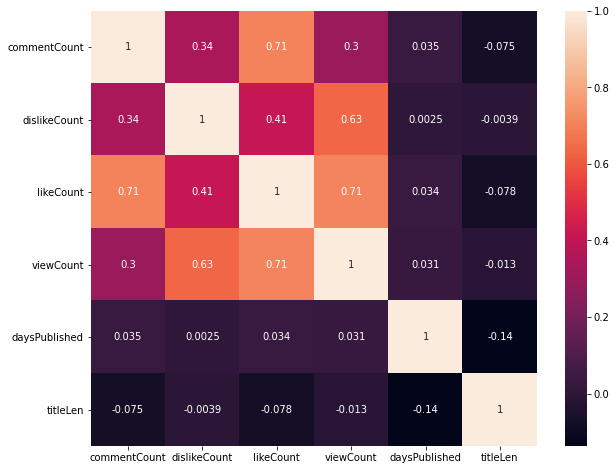

In [26]:
plt.figure(figsize = (10,8))

#Let's verify the correlation of each value
sns.heatmap(video_info[['commentCount','dislikeCount','likeCount','viewCount','daysPublished','titleLen']].corr(), annot=True)
plt.show()

### Publishing Time

In [27]:
video_info["publishedAt"]=pd.to_datetime(video_info["publishedAt"])

In [28]:
video_info["publish_Year"]=video_info["publishedAt"].apply(lambda time:time.year)
video_info["publish_Month"]=video_info["publishedAt"].apply(lambda time:time.month)
video_info["publish_Day"]=video_info["publishedAt"].apply(lambda time:time.day)
video_info["publish_Day_of_Week"]=video_info["publishedAt"].apply(lambda time:time.dayofweek)
video_info["Publish_Hour"]=video_info["publishedAt"].apply(lambda time:time.hour)

In [41]:
video_info

,channelId,description,publishedAt,videoId,thumbnails,videoTitle,commentCount,dislikeCount,likeCount,viewCount,...,likeDislikeRatio,likeCountByDay,commentCountByDay,viewCountByDay,titleLen,publish_Year,publish_Month,publish_Day,publish_Day_of_Week,Publish_Hour
0,UCjOl2AUblVmg2rA_cRgZkFg,"In this week's Top Gear, Flintoff gets his han...",2020-10-09 09:35:54,NXX338WY_Lw,https://i.ytimg.com/vi/NXX338WY_Lw/default.jpg,PREVIEW: Attempting 200mph in the Jaguar XJ220...,528.0,257.0,5819.0,184447.0,...,22.642023,1939.666667,176.000000,61482.333333,11,2020,10,9,4,9
1,UCjOl2AUblVmg2rA_cRgZkFg,"From the humble new Volkswagen GTI, right down...",2020-10-09 11:21:23,dtHcdU2c71Y,https://i.ytimg.com/vi/dtHcdU2c71Y/default.jpg,Which car will win Top Gear Speed Week 2020? (...,568.0,273.0,7136.0,217619.0,...,26.139194,2378.666667,189.333333,72539.666667,14,2020,10,9,4,11
2,UCjOl2AUblVmg2rA_cRgZkFg,Here's Chris Harris' take on the rocket-disgui...,2020-10-07 07:40:22,vnrtWe-RAzg,https://i.ytimg.com/vi/vnrtWe-RAzg/default.jpg,Chris Harris on... the Ferrari SF90 Stradale |...,1091.0,408.0,10189.0,437777.0,...,24.973039,2037.800000,218.200000,87555.400000,9,2020,10,7,2,7
3,UCjOl2AUblVmg2rA_cRgZkFg,"16 contenders, 8,553bhp and a festival to reme...",2020-10-06 13:59:38,Ra1F0TsOCPs,https://i.ytimg.com/vi/Ra1F0TsOCPs/default.jpg,Chris Harris vs 2020’s Best Performance Cars |...,579.0,202.0,7126.0,191070.0,...,35.277228,1187.666667,96.500000,31845.000000,13,2020,10,6,1,13
4,UCjOl2AUblVmg2rA_cRgZkFg,"The 986bhp Ferrari SF90 is, unsurprisingly, no...",2020-10-06 07:36:13,fXysipmTxcQ,https://i.ytimg.com/vi/fXysipmTxcQ/default.jpg,FASTEST TOP GEAR LAP? Ferrari SF90 Stiglap | T...,888.0,168.0,9697.0,572569.0,...,57.720238,1616.166667,148.000000,95428.166667,11,2020,10,6,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408685,UCwiTOchWeKjrJZw7S1H__1g,London cafe Sloane Brothers sells rainbow crep...,2017-02-28 18:04:16,DaoL1-H1ReE,https://i.ytimg.com/vi/DaoL1-H1ReE/default.jpg,Rainbow crepes with chocolate brownies,4.0,4.0,75.0,5555.0,...,18.750000,0.056732,0.003026,4.201967,5,2017,2,28,1,18
408686,UCwiTOchWeKjrJZw7S1H__1g,Run by the Condurro family since the 1870s and...,2017-02-06 09:28:13,ERMJ5xE7-6A,https://i.ytimg.com/vi/ERMJ5xE7-6A/default.jpg,"The ""world's best pizzeria'"" is in London",43.0,25.0,424.0,36623.0,...,16.960000,0.315476,0.031994,27.249256,8,2017,2,6,0,9
408687,UCwiTOchWeKjrJZw7S1H__1g,People line up for hours at the Good Food Karv...,2016-04-28 17:38:03,scdq2xfCE34,https://i.ytimg.com/vi/scdq2xfCE34/default.jpg,Ice cream-filled donut cones in Prague,7.0,4.0,114.0,9213.0,...,28.500000,0.070025,0.004300,5.659091,7,2016,4,28,3,17
408688,UCwiTOchWeKjrJZw7S1H__1g,We went to one of the eight Ping Pong restaura...,2016-04-28 17:32:27,HgJI5ybtk5Y,https://i.ytimg.com/vi/HgJI5ybtk5Y/default.jpg,Inside London's dim sum chain Ping Pong,5.0,3.0,64.0,5868.0,...,21.333333,0.039312,0.003071,3.604423,8,2016,4,28,3,17


In [29]:
dmap1 = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'} #Day of the week
video_info["publish_Day_of_Week"]=video_info["publish_Day_of_Week"].map(dmap1)

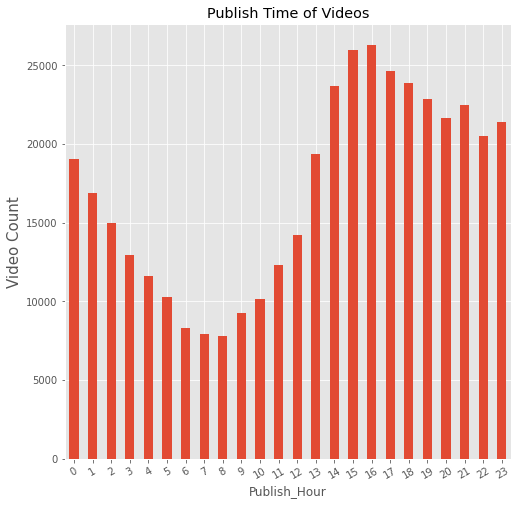

In [30]:
# Time of Uploads
plt.style.use('ggplot')
plt.figure(figsize=(8,8))
list3=video_info.groupby("Publish_Hour").count()["channelId"].plot.bar() #just to get video count
list3.set_xticklabels(list3.get_xticklabels(),rotation=30)
list3.set_ylabel("Video Count", fontsize=15)
plt.title("Publish Time of Videos")
sb.set_context(font_scale=1)

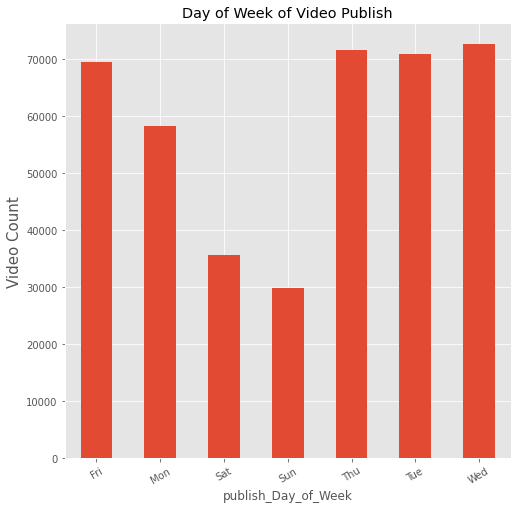

In [31]:
# Day of Week of Uploads
plt.style.use('ggplot')
plt.figure(figsize=(8,8))
list3=video_info.groupby("publish_Day_of_Week").count()["channelId"].plot.bar() #just to get video count
list3.set_xticklabels(list3.get_xticklabels(),rotation=30)
list3.set_ylabel("Video Count", fontsize=15)
plt.title("Day of Week of Video Publish")
sb.set_context(font_scale=1)

#### Most Watched Video

Text(0.5, 1.0, 'Most Watched Video on YouTube')

C:\Users\Kai Bing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kai Bing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 56438 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kai Bing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Kai Bing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 56438 missing from current font.
  font.set_text(s, 0, flags=flags)


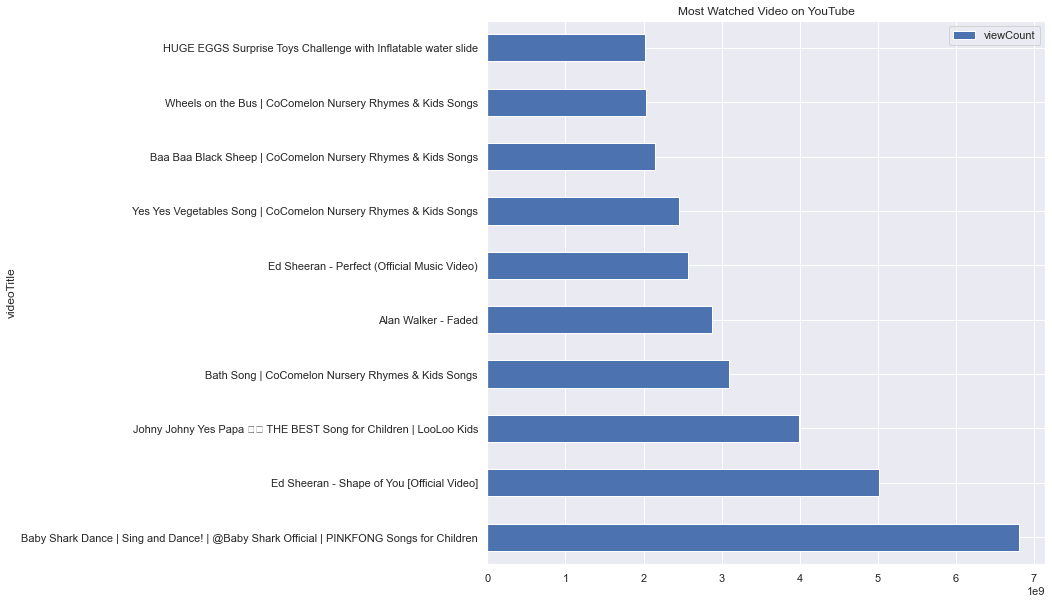

In [32]:
list10=video_info[["videoTitle","viewCount"]].sort_values(by="viewCount",ascending=True)
list11=list10.sort_values(by="viewCount",ascending=False)
list12=list11.head(10)
list12.set_index("videoTitle",inplace=True)
#I'm not eliminating any data from the Mian Data Frame
#Instead I create a sub set for sake of simplicity
plt.style.use('ggplot')
sb.set(rc={"figure.figsize":(10,10)})
list12.plot.barh()
plt.title("Most Watched Video on YouTube")
#Same Technique Can Be Applied to Find Most Commented,Liked,disliked videos

#### Most Liked Video

Text(0.5, 1.0, 'Most Liked Video on YouTube')

C:\Users\Kai Bing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46748 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kai Bing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kai Bing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 46748 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Kai Bing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 46160 missing from current font.
  font.set_text(s, 0, flags=flags)


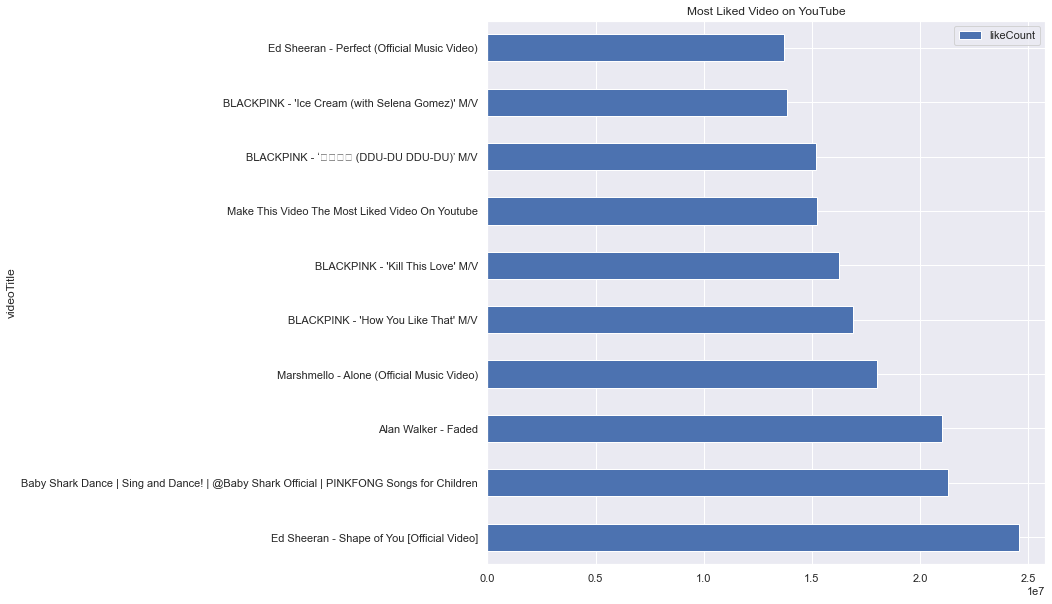

In [33]:
list10=video_info[["videoTitle","likeCount"]].sort_values(by="likeCount",ascending=True)
list11=list10.sort_values(by="likeCount",ascending=False)
list12=list11.head(10)
list12.set_index("videoTitle",inplace=True)
#I'm not eliminating any data from the Mian Data Frame
#Instead I create a sub set for sake of simplicity
plt.style.use('ggplot')
sb.set(rc={"figure.figsize":(10,10)})
list12.plot.barh()
plt.title("Most Liked Video on YouTube")
#Same Technique Can Be Applied to Find Most Commented,Liked,disliked videos

#### Most Disliked Video

Text(0.5, 1.0, 'Most Disliked Video on YouTube')

C:\Users\Kai Bing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kai Bing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 56438 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kai Bing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Kai Bing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 56438 missing from current font.
  font.set_text(s, 0, flags=flags)


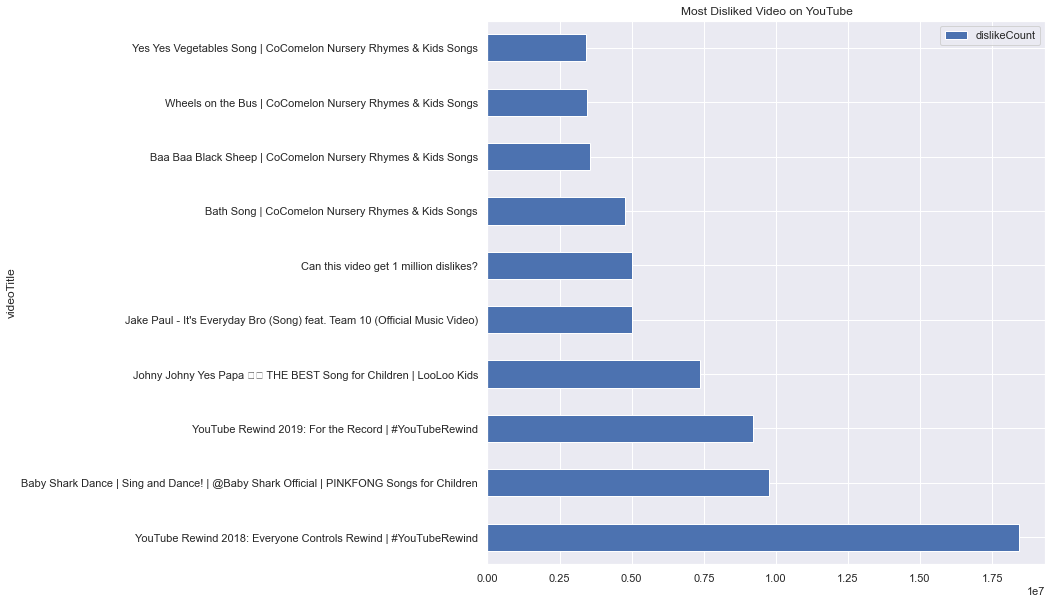

In [35]:
#most dislike
list10=video_info[["videoTitle","dislikeCount"]].sort_values(by="dislikeCount",ascending=True)
list11=list10.sort_values(by="dislikeCount",ascending=False)
list12=list11.head(10)
list12.set_index("videoTitle",inplace=True)
#I'm not eliminating any data from the Mian Data Frame
#Instead I create a sub set for sake of simplicity
plt.style.use('ggplot')
sb.set(rc={"figure.figsize":(10,10)})
list12.plot.barh()
plt.title("Most Disliked Video on YouTube")
#Same Technique Can Be Applied to Find Most Commented,Liked,disliked videos

### Most Popular Untruncated Words in Titles
First 70 characters

In [7]:
video_info.head(5)

,channelId,description,publishedAt,videoId,thumbnails,videoTitle,commentCount,dislikeCount,likeCount,viewCount,daysPublished,likeDislikeRatio,likeCountByDay,commentCountByDay,viewCountByDay,titleLen
0,UCjOl2AUblVmg2rA_cRgZkFg,"In this week's Top Gear, Flintoff gets his han...",2020-10-09 09:35:54,NXX338WY_Lw,https://i.ytimg.com/vi/NXX338WY_Lw/default.jpg,PREVIEW: Attempting 200mph in the Jaguar XJ220...,528.0,257.0,5819.0,184447.0,3,22.642023,1939.666667,176.000000,61482.333333,11
1,UCjOl2AUblVmg2rA_cRgZkFg,"From the humble new Volkswagen GTI, right down...",2020-10-09 11:21:23,dtHcdU2c71Y,https://i.ytimg.com/vi/dtHcdU2c71Y/default.jpg,Which car will win Top Gear Speed Week 2020? (...,568.0,273.0,7136.0,217619.0,3,26.139194,2378.666667,189.333333,72539.666667,14
2,UCjOl2AUblVmg2rA_cRgZkFg,Here's Chris Harris' take on the rocket-disgui...,2020-10-07 07:40:22,vnrtWe-RAzg,https://i.ytimg.com/vi/vnrtWe-RAzg/default.jpg,Chris Harris on... the Ferrari SF90 Stradale |...,1091.0,408.0,10189.0,437777.0,5,24.973039,2037.800000,218.200000,87555.400000,9
3,UCjOl2AUblVmg2rA_cRgZkFg,"16 contenders, 8,553bhp and a festival to reme...",2020-10-06 13:59:38,Ra1F0TsOCPs,https://i.ytimg.com/vi/Ra1F0TsOCPs/default.jpg,Chris Harris vs 2020’s Best Performance Cars |...,579.0,202.0,7126.0,191070.0,6,35.277228,1187.666667,96.500000,31845.000000,13
4,UCjOl2AUblVmg2rA_cRgZkFg,"The 986bhp Ferrari SF90 is, unsurprisingly, no...",2020-10-06 07:36:13,fXysipmTxcQ,https://i.ytimg.com/vi/fXysipmTxcQ/default.jpg,FASTEST TOP GEAR LAP? Ferrari SF90 Stiglap | T...,888.0,168.0,9697.0,572569.0,6,57.720238,1616.166667,148.000000,95428.166667,11


In [13]:
shortenTitle = [x[0:70] for x in video_info['videoTitle']]

In [15]:
shortenTitle[0:5]

['PREVIEW: Attempting 200mph in the Jaguar XJ220 | Top Gear: Series 29',
 'Which car will win Top Gear Speed Week 2020? (4K) | The Contenders | T',
 'Chris Harris on... the Ferrari SF90 Stradale | Top Gear',
 'Chris Harris vs 2020’s Best Performance Cars | Top Gear Magazine Speed',
 'FASTEST TOP GEAR LAP? Ferrari SF90 Stiglap | Top Gear: Series 29']

In [23]:
import collections
import re
import nltk
from nltk.corpus import stopwords

In [45]:
stopwords = nltk.corpus.stopwords.words('english')
wordcount = collections.defaultdict(int)
pattern = r"\W+"
for sent in shortenTitle:
    for word in sent.lower().split():
        word = re.sub(pattern, ' ', word)
        if word not in stopwords:
            wordcount[word] += 1

In [51]:
# printing most common words
to_print = 21 # whitespace was counted

mc = sorted(wordcount.items(), key=lambda k_v: k_v[1], reverse=True)[:to_print] 
print("Remove the counted whitespace: " + str(mc[0]))
mc = mc[1:]
print("Most freqent 20 words:")
for word, count in mc:
     print(word, ":", count)

Remove the counted whitespace: (' ', 236968)
Most freqent 20 words:
trump : 18312
news : 18267
new : 15068
scene : 13223
bbc : 10219
movieclips : 10203
nbc : 9836
wwe : 8903
kids : 8281
movie : 8101
top : 7197
coronavirus : 6784
baby : 6690
clip : 6665
best : 6609
today : 6474
vs  : 6464
vs : 6282
us : 5854
5 : 5713


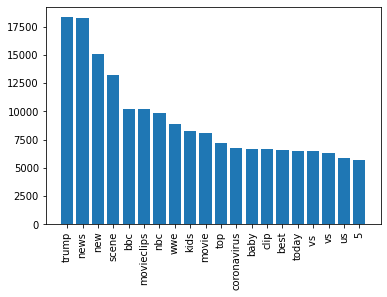

In [52]:
# Draw the bar chart
mc = dict(mc)
names = list(mc.keys())
values = list(mc.values())
plt.bar(range(len(mc)),values,tick_label=names)
plt.xticks(rotation=90)
plt.show()

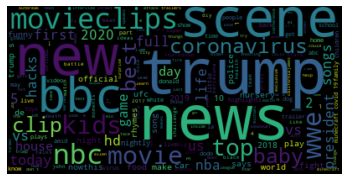

In [53]:
wc = WordCloud().generate_from_frequencies(wordcount)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()